# Continual Learning


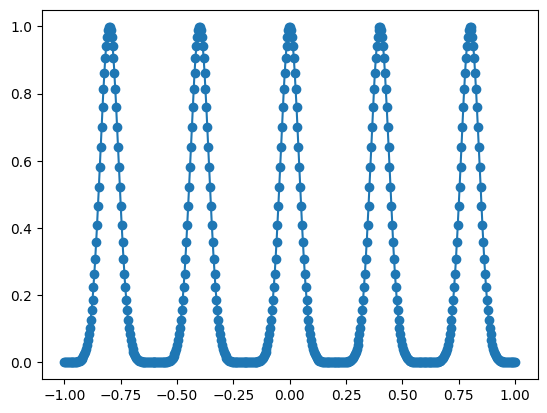

In [7]:
from lkan.models import KAN, MLP
from lkan.trainers import BasicKANTrainer, BasicMLPTrainer
from lkan.datamodule import OwnDataModule2
from lkan.loggers import PrintLogger
import numpy as np
import torch
import matplotlib.pyplot as plt

datasets = []

n_peak = 5
n_num_per_peak = 100
n_sample = n_peak * n_num_per_peak

x_grid = torch.linspace(-1, 1, steps=n_sample)

x_centers = 2 / n_peak * (np.arange(n_peak) - n_peak / 2 + 0.5)

x_sample = torch.stack(
    [
        torch.linspace(-1 / n_peak, 1 / n_peak, steps=n_num_per_peak) + center
        for center in x_centers
    ]
).reshape(
    -1,
)


y = 0.0
for center in x_centers:
    y += torch.exp(-((x_grid - center) ** 2) * 300)

y_sample = 0.0
for center in x_centers:
    y_sample += torch.exp(-((x_sample - center) ** 2) * 300)


plt.plot(x_grid.detach().numpy(), y.detach().numpy())
plt.scatter(x_sample.detach().numpy(), y_sample.detach().numpy())

Sequentially prensenting different peaks to KAN


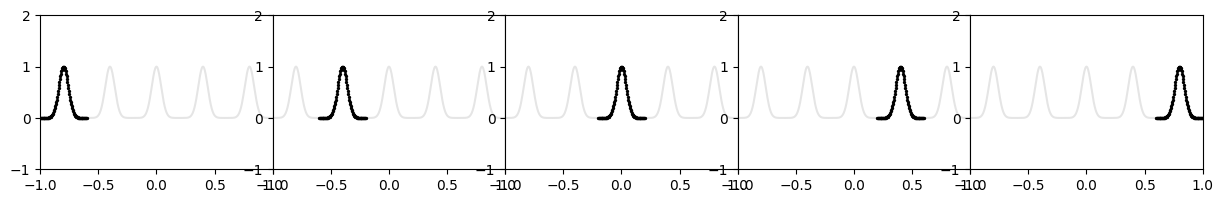

In [8]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color="black", alpha=0.1)
    plt.scatter(
        x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak]
        .detach()
        .numpy(),
        y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak]
        .detach()
        .numpy(),
        color="black",
        s=2,
    )
    plt.xlim(-1, 1)
    plt.ylim(-1, 2)

Training KAN


In [3]:
# FFT version

ys = []

# grid_size = 100 because fft have 2 coefficients (one for cos and one for sin)
model = KAN([1, 1], grid_size=100, noise_scale=0.1, device="cpu", kan_layer_version="fft", bias=False, scale_spline_trainable=False, scale_base_trainable=False)

for group_id in range(n_peak):
    x_ds = x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    y_ds = y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    dm = OwnDataModule2(1, x_ds, y_ds, x_ds, y_ds)
    trainer = BasicKANTrainer(model, lr=0.0002, logger=PrintLogger(100, 100), device="cpu")
    trainer.fit(dm, max_epochs=1000, max_steps=1000)
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 280.29it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.10058499127626419
train/lr: 0.0002


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 275.55it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.1242886632680893
train/lr: 0.0002


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 277.30it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.00011122957948828116
train/lr: 0.0002


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 289.58it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 5.366906634662882e-07
train/lr: 0.0002


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 285.38it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 4.232962055539247e-06
train/lr: 0.0002


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 269.48it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 3.647648583182672e-08
train/lr: 0.0002


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 241.89it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 4.13572124671191e-05
train/lr: 0.0002


Epoch: 7 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]Exception ignored in: <function _releaseLock at 0x7f1ffa68f1c0>
Traceback (most recent call last):
  File "/home/indoxer/.conda/envs/lkan/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
100%|██████████| 100/100 [00:00<00:00, 272.17it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 2.125504352079588e-06
train/lr: 0.0002


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 272.95it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 5.1457351219141856e-05
train/lr: 0.0002


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 272.84it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 2.0358769688755274e-05
train/lr: 0.0002


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 283.09it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.000671976653393358
train/lr: 0.0002


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 243.60it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.0001785380154615268
train/lr: 0.0002


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 274.96it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.003584795631468296
train/lr: 0.0002


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 258.68it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 3.6402274417923763e-05
train/lr: 0.0002


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 277.69it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 1.3365790437092073e-05
train/lr: 0.0002


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 264.53it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 6.294173090282129e-06
train/lr: 0.0002


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 230.07it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 1.0292675600709345e-09
train/lr: 0.0002


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 273.22it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 4.381780854600947e-06
train/lr: 0.0002


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 271.48it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 6.613105506403372e-05
train/lr: 0.0002


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 259.23it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 1.0503016483198735e-06
train/lr: 0.0002


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 257.14it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.08393432945013046
train/lr: 0.0002


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 259.46it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 2.885091453208588e-05
train/lr: 0.0002


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 268.20it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.028960926458239555
train/lr: 0.0002


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 284.77it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 1.6492738723172806e-05
train/lr: 0.0002


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 291.70it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 2.9754815500382392e-08
train/lr: 0.0002


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 311.19it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 1.653106664889492e-05
train/lr: 0.0002


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 299.13it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 5.158210115041584e-06
train/lr: 0.0002


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 299.93it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 3.664133146230597e-06
train/lr: 0.0002


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 278.95it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 2.8275394470256288e-06
train/lr: 0.0002


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 287.55it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 3.089938763878308e-05
train/lr: 0.0002


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 285.50it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.0002078801771858707
train/lr: 0.0002


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 293.27it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.00010679032129701227
train/lr: 0.0002


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 281.12it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 2.0267452782718465e-05
train/lr: 0.0002


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 296.76it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.00014301753253675997
train/lr: 0.0002


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 273.95it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 5.887637598789297e-06
train/lr: 0.0002


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 292.67it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 0.00018653979350347072
train/lr: 0.0002


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 290.65it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 2.9520922453230014e-06
train/lr: 0.0002


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 282.88it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.0001605913566891104
train/lr: 0.0002


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 288.85it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.00011642405297607183
train/lr: 0.0002


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 204.06it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 1.8649894073519135e-08
train/lr: 0.0002


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 281.02it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 8.674815035192296e-06
train/lr: 0.0002


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 286.47it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 1.5828376263016253e-06
train/lr: 0.0002


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 299.20it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.00012412226351443678
train/lr: 0.0002


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 278.35it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.00015025516040623188
train/lr: 0.0002


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 283.28it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 0.0007573660113848746
train/lr: 0.0002


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 275.90it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 5.433615797301172e-07
train/lr: 0.0002


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 273.19it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 6.288412350841099e-07
train/lr: 0.0002


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 276.22it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.00016350125952158123
train/lr: 0.0002


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 289.52it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.00014638574793934822
train/lr: 0.0002


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 282.83it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 4.14465248468332e-05
train/lr: 0.0002


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


In [5]:
# "1" version

ys = []

model = KAN([1, 1], grid_size=200, k=3, noise_scale=0.1, device="cpu", kan_layer_version="1", bias=False, scale_spline_trainable=False, scale_base_trainable=False)

for group_id in range(n_peak):
    x_ds = x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    y_ds = y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    dm = OwnDataModule2(1, x_ds, y_ds, x_ds, y_ds)
    trainer = BasicKANTrainer(model, lr=0.005, logger=PrintLogger(100, 100), device="cpu") 
    trainer.fit(dm, max_epochs=1000, max_steps=1000)
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 257.71it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.0011120529379695654
train/lr: 0.005


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 270.58it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.8599512577056885
train/lr: 0.005


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 270.81it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.38322439789772034
train/lr: 0.005


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 267.22it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 2.5524725060677156e-05
train/lr: 0.005


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 265.00it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 2.103821316268295e-05
train/lr: 0.005


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 243.32it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 1.427200544412699e-07
train/lr: 0.005


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 263.77it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 1.2891863661934622e-05
train/lr: 0.005


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 260.50it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 1.978372210942325e-06
train/lr: 0.005


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 276.41it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 1.3305481161296484e-06
train/lr: 0.005


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 267.34it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 8.519157290720614e-07
train/lr: 0.005


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]


End...
Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 288.23it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.0006106216460466385
train/lr: 0.005


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 290.04it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.7251092791557312
train/lr: 0.005


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 287.33it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 5.488151600729907e-06
train/lr: 0.005


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 274.77it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 1.1389929568395019e-05
train/lr: 0.005


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 252.26it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 1.5108518880424526e-07
train/lr: 0.005


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 268.89it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 6.234286502149189e-06
train/lr: 0.005


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 230.67it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 0.0017823318485170603
train/lr: 0.005


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 260.52it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.05528522655367851
train/lr: 0.005


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 276.46it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 9.818157195695676e-06
train/lr: 0.005


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 276.44it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 1.0916897963397787e-06
train/lr: 0.005


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 269.73it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 3.603925506467931e-05
train/lr: 0.005


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 278.62it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 2.197257344960235e-06
train/lr: 0.005


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 288.64it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.0030014074873179197
train/lr: 0.005


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 283.13it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.0003001756558660418
train/lr: 0.005


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 275.49it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 4.1624971345299855e-05
train/lr: 0.005


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 276.91it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 0.00027076771948486567
train/lr: 0.005


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 265.59it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 9.526505164103583e-05
train/lr: 0.005


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 256.35it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 4.467084727366455e-05
train/lr: 0.005


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 278.04it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 7.087115227477625e-05
train/lr: 0.005


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 292.45it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 0.000877531070727855
train/lr: 0.005


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 260.74it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.1041937842965126
train/lr: 0.005


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 272.69it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.09380896389484406
train/lr: 0.005


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 268.29it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.00011944783909711987
train/lr: 0.005


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 261.07it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.16272607445716858
train/lr: 0.005


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 252.86it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 0.023173291236162186
train/lr: 0.005


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 209.70it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 3.1319601134782715e-07
train/lr: 0.005


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 262.46it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 3.488577203825116e-05
train/lr: 0.005


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 284.19it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 2.892104475904489e-07
train/lr: 0.005


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 268.38it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.00033425141009502113
train/lr: 0.005


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 292.02it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 2.8759852284565568e-05
train/lr: 0.005


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 267.32it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.04336986318230629
train/lr: 0.005


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 262.24it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.006312273442745209
train/lr: 0.005


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 275.36it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.000765560835134238
train/lr: 0.005


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 278.44it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.0025330607313662767
train/lr: 0.005


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 258.71it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 1.2405186680553015e-05
train/lr: 0.005


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 243.00it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 2.2443130092142383e-06
train/lr: 0.005


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 265.51it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 0.00013625559222418815
train/lr: 0.005


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 259.89it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.0013598849764093757
train/lr: 0.005


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 257.97it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 2.6349664494773606e-06
train/lr: 0.005


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 250.65it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 3.7991790122759994e-06
train/lr: 0.005


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]


End...


In [19]:
# MLP version
# TODO: MLP is not working well, I can't fit the data. (Maybe ReLU is not good for this data, check LeakyReLU)

ys = []

model = MLP([1,3000,10,3000,1], device="cpu")

for group_id in range(n_peak):
    x_ds = x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    y_ds = y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    dm = OwnDataModule2(1, x_ds, y_ds, x_ds, y_ds)
    trainer = BasicMLPTrainer(model, lr=0.003, logger=PrintLogger(100, 100), device="cpu") 
    trainer.fit(dm, max_epochs=1000, max_steps=1000)
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 221.66it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.13009671866893768
train/lr: 0.003


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 223.35it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.003178820013999939
train/lr: 0.003


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 215.81it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.0074898418970406055
train/lr: 0.003


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 231.85it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.7474130988121033
train/lr: 0.003


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 224.17it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 0.01747889257967472
train/lr: 0.003


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 218.25it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 0.0022365122567862272
train/lr: 0.003


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 219.67it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 0.001915452303364873
train/lr: 0.003


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 228.64it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.0893736407160759
train/lr: 0.003


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 230.84it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.01910470984876156
train/lr: 0.003


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 232.89it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 0.009850136935710907
train/lr: 0.003


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]


End...
Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 224.24it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.7544581890106201
train/lr: 0.003


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 218.00it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.05030512064695358
train/lr: 0.003


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 218.42it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.00442676292732358
train/lr: 0.003


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 218.19it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.7164573669433594
train/lr: 0.003


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 220.35it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 0.4658654034137726
train/lr: 0.003


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 225.22it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 0.003973664250224829
train/lr: 0.003


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 227.89it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 0.04334355145692825
train/lr: 0.003


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 225.49it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.04326515644788742
train/lr: 0.003


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 219.47it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.022917713969945908
train/lr: 0.003


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 229.42it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 0.01123134233057499
train/lr: 0.003


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 218.89it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.01403152383863926
train/lr: 0.003


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 223.58it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.02183186076581478
train/lr: 0.003


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 232.33it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.61464524269104
train/lr: 0.003


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 222.94it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.015406200662255287
train/lr: 0.003


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 229.05it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 0.02094796858727932
train/lr: 0.003


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:01<00:00, 98.79it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 0.022484607994556427
train/lr: 0.003


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 224.65it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 0.016202624887228012
train/lr: 0.003


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 219.39it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.0011616129195317626
train/lr: 0.003


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 215.86it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.025854624807834625
train/lr: 0.003


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 222.16it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 0.6677194833755493
train/lr: 0.003


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 225.63it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.04215601459145546
train/lr: 0.003


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 214.11it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.04301687330007553
train/lr: 0.003


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 214.57it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.020921453833580017
train/lr: 0.003


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 212.98it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.013794719241559505
train/lr: 0.003


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 207.29it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 0.02364661544561386
train/lr: 0.003


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 214.62it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 0.025526894256472588
train/lr: 0.003


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 209.54it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 0.0006883346359245479
train/lr: 0.003


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 201.29it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.06524849683046341
train/lr: 0.003


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 200.73it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.7053437232971191
train/lr: 0.003


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 199.14it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 0.011676098220050335
train/lr: 0.003


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 200.85it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.0229186974465847
train/lr: 0.003


Epoch: 1 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 183.71it/s]


Step: 199 - Validation - Metrics:
train/metrics/loss: 0.07308550179004669
train/lr: 0.003


Epoch: 2 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 202.13it/s]


Step: 299 - Validation - Metrics:
train/metrics/loss: 0.005040368530899286
train/lr: 0.003


Epoch: 3 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 216.88it/s]


Step: 399 - Validation - Metrics:
train/metrics/loss: 0.02532840520143509
train/lr: 0.003


Epoch: 4 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 225.16it/s]


Step: 499 - Validation - Metrics:
train/metrics/loss: 0.5578449368476868
train/lr: 0.003


Epoch: 5 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 215.06it/s]


Step: 599 - Validation - Metrics:
train/metrics/loss: 0.02480599656701088
train/lr: 0.003


Epoch: 6 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 206.47it/s]


Step: 699 - Validation - Metrics:
train/metrics/loss: 0.6104437708854675
train/lr: 0.003


Epoch: 7 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 224.53it/s]


Step: 799 - Validation - Metrics:
train/metrics/loss: 0.023265818133950233
train/lr: 0.003


Epoch: 8 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 222.37it/s]


Step: 899 - Validation - Metrics:
train/metrics/loss: 0.02775002084672451
train/lr: 0.003


Epoch: 9 / 1000
Training...


100%|██████████| 100/100 [00:00<00:00, 214.20it/s]


Step: 999 - Validation - Metrics:
train/metrics/loss: 0.7180668711662292
train/lr: 0.003


Epoch: 10 / 1000
Training...


  0%|          | 0/100 [00:00<?, ?it/s]

End...


Prediction of KAN after each stage


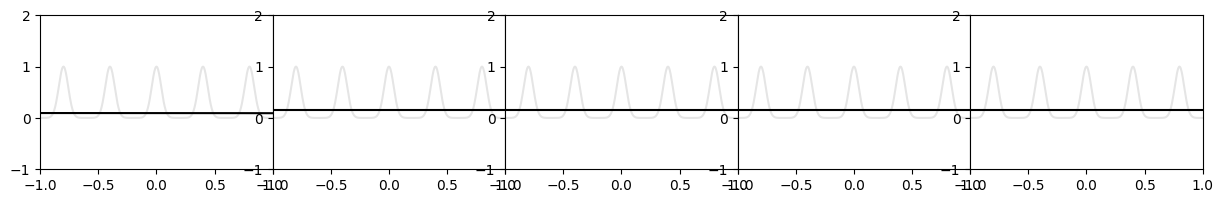

In [20]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color="black", alpha=0.1)
    plt.plot(x_grid.detach().numpy(), ys[i - 1], color="black")
    plt.xlim(-1, 1)
    plt.ylim(-1, 2)
    
# not ideal, but probably because of Adam optimizer.
# KANLinear > KanLinearFFT >> MLP in terms of catastrophic forgetting (I think)